## Plot movie timecourses

In [2]:
# RUN THIS CELL
# import packages, check folders
#%reset
from pathlib import Path
import os
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
import pickle

%matplotlib inline

working_dir = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code'
#working_dir = os.getcwd()
print('current directory:\n',working_dir)
path = Path(working_dir)
parent_folder = path.parent
#print('parent folder:', parent_folder)
data_file_loc = os.path.join(parent_folder,'data') # to store data we extract later in this notebook
#data_file_loc = os.getcwd()

current directory:
 /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code


In [3]:
vidnames = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", 
            "Random mechanical", "Scaring", "SEDUCING-B", "STAR-A", 
            "SURPRISING-B", "TENNIS-A"]

In [4]:
# setting default fontsizes for plots

s=16 # CHANGE FONTSIZE HERE

plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend
#import matplotlib as mpl
#mpl.rcParams['font.weight']= 'normal'


In [6]:
#red_rgb = [103,0,31] # edges of RdBu
#blue_rgb = [5,48,97] # edges of RdBu
red_rgb =[188,61,62] # from Emily
blue_rgb = [54,122,177] # from Emily
red_rgb = np.array(red_rgb)/255
blue_rgb = np.array(blue_rgb)/255
alpha = .2 # transparency inside boxplots, for datapts etc.

In [22]:
# load behavioral data - coded 1 for "social", 0 for "nonsocial" and 9 for "unsure", nan for missed response
responses = np.load(os.path.join(data_file_loc,'responses.npy'))
responses.shape # subs *movies

(1048, 10)

## plot timecourses

In [8]:
tcs_run_z = np.load(os.path.join(data_file_loc,'timecourses_run_norm',f'timecourse-all-movies_zscorenorm.npy'))  # movie wise timecourses from tr-14:tr+14
tcs_run_z.shape
# load run-norm data

(1048, 268, 56, 10)

In [9]:
fig_save_loc = os.path.join('/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/paper_prep/figures/fig5_timecourse/')

## Rand mech

In [24]:
coef_slope_rand = np.load(os.path.join(data_file_loc,'coefs_run_norm','slope_reg','coef_slopereg_runnorm_Random mechanical.npy'))
coef_slope_rand.shape

(1048, 268)

In [27]:
movie_ind = 4
mean_slope_soc = np.nanmean(coef_slope_rand[responses[:,movie_ind]==1,:],axis=0)
mean_slope_nonsoc = np.nanmean(coef_slope_rand[responses[:,movie_ind]==0,:],axis=0)
mean_slope_soc.shape

(268,)

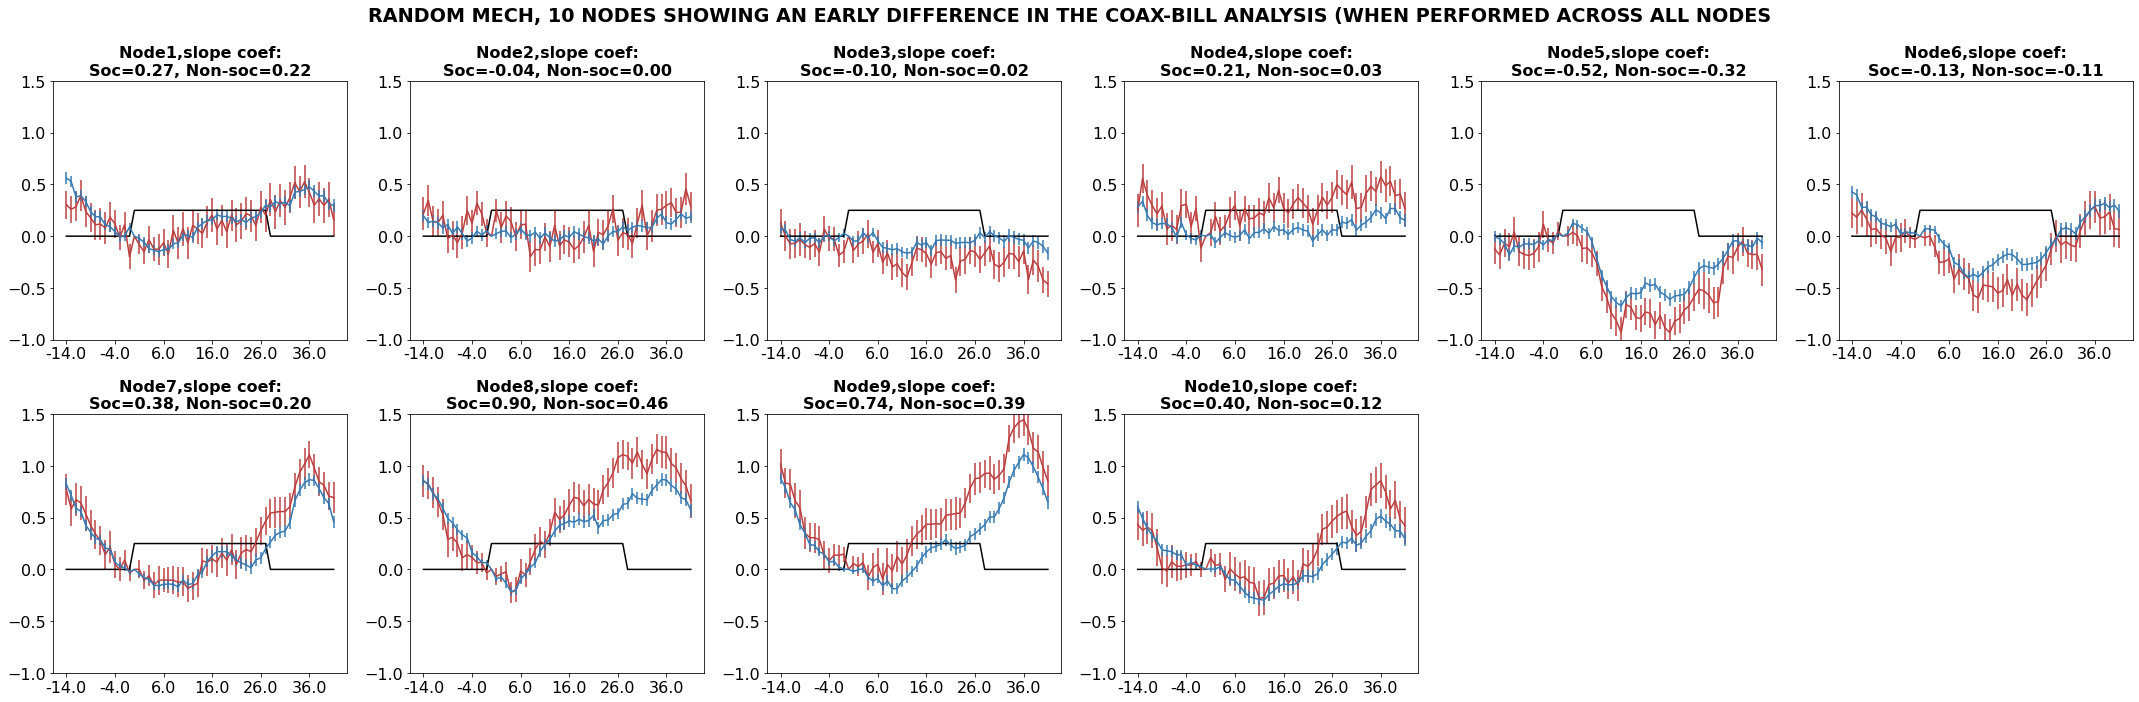

In [37]:
nodes_tc_auc_analysis = [20,22,23,26,73,104,157,164,208,262] # nodes that showed up in the AUC analysis
movie_ind = 4
# all movies
ymin,ymax = -1,1.5
plt.figure(1,figsize=(30,10))
plt.suptitle('RANDOM MECH, 10 NODES SHOWING AN EARLY DIFFERENCE IN THE COAX-BILL ANALYSIS (WHEN PERFORMED ACROSS ALL NODES',fontweight = 'bold')
boxcar = np.zeros((56,))
boxcar[14:42] = .25
for i,n in enumerate(np.where(nodes_tc_auc_analysis)[0]):
    plt.subplot (2,6,i+1)
    plt.title(f'Node{n+1},slope coef:\nSoc={mean_slope_soc[n]:.2f}, Non-soc={mean_slope_nonsoc[n]:.2f}',fontweight = 'bold')
    plt.ylim(ymin,ymax)
    y1 = tcs_run_z[responses[:,movie_ind]==1,n,:,movie_ind]# subs*timepts
    y2 = tcs_run_z[responses[:,movie_ind]==0,n,:,movie_ind]
    plt.errorbar(range(y1.shape[1]),np.nanmean(y1,axis=0),stats.sem(y1,axis=0,nan_policy='omit'),color = red_rgb)
    plt.errorbar(range(y2.shape[1]),np.nanmean(y2,axis=0),stats.sem(y2,axis=0,nan_policy='omit'),color = blue_rgb)
    plt.xticks(np.linspace(0,60,7),[str(np.round(i,2)-14) for i in np.linspace(0,60,7)])
    plt.plot(boxcar,color = 'k')
    
plt.tight_layout()


#plt.savefig(os.path.join(fig_save_loc,'all_timecourse_S_NS.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


In [33]:
nodes_coaxbill_rand_all = np.load(os.path.join(data_file_loc,'nodes_coaxbill_rand_all.npy'))
# nodes that showed up in the GLM analysis of fig 3
np.where(nodes_coaxbill_rand_all)[0].shape

(74,)

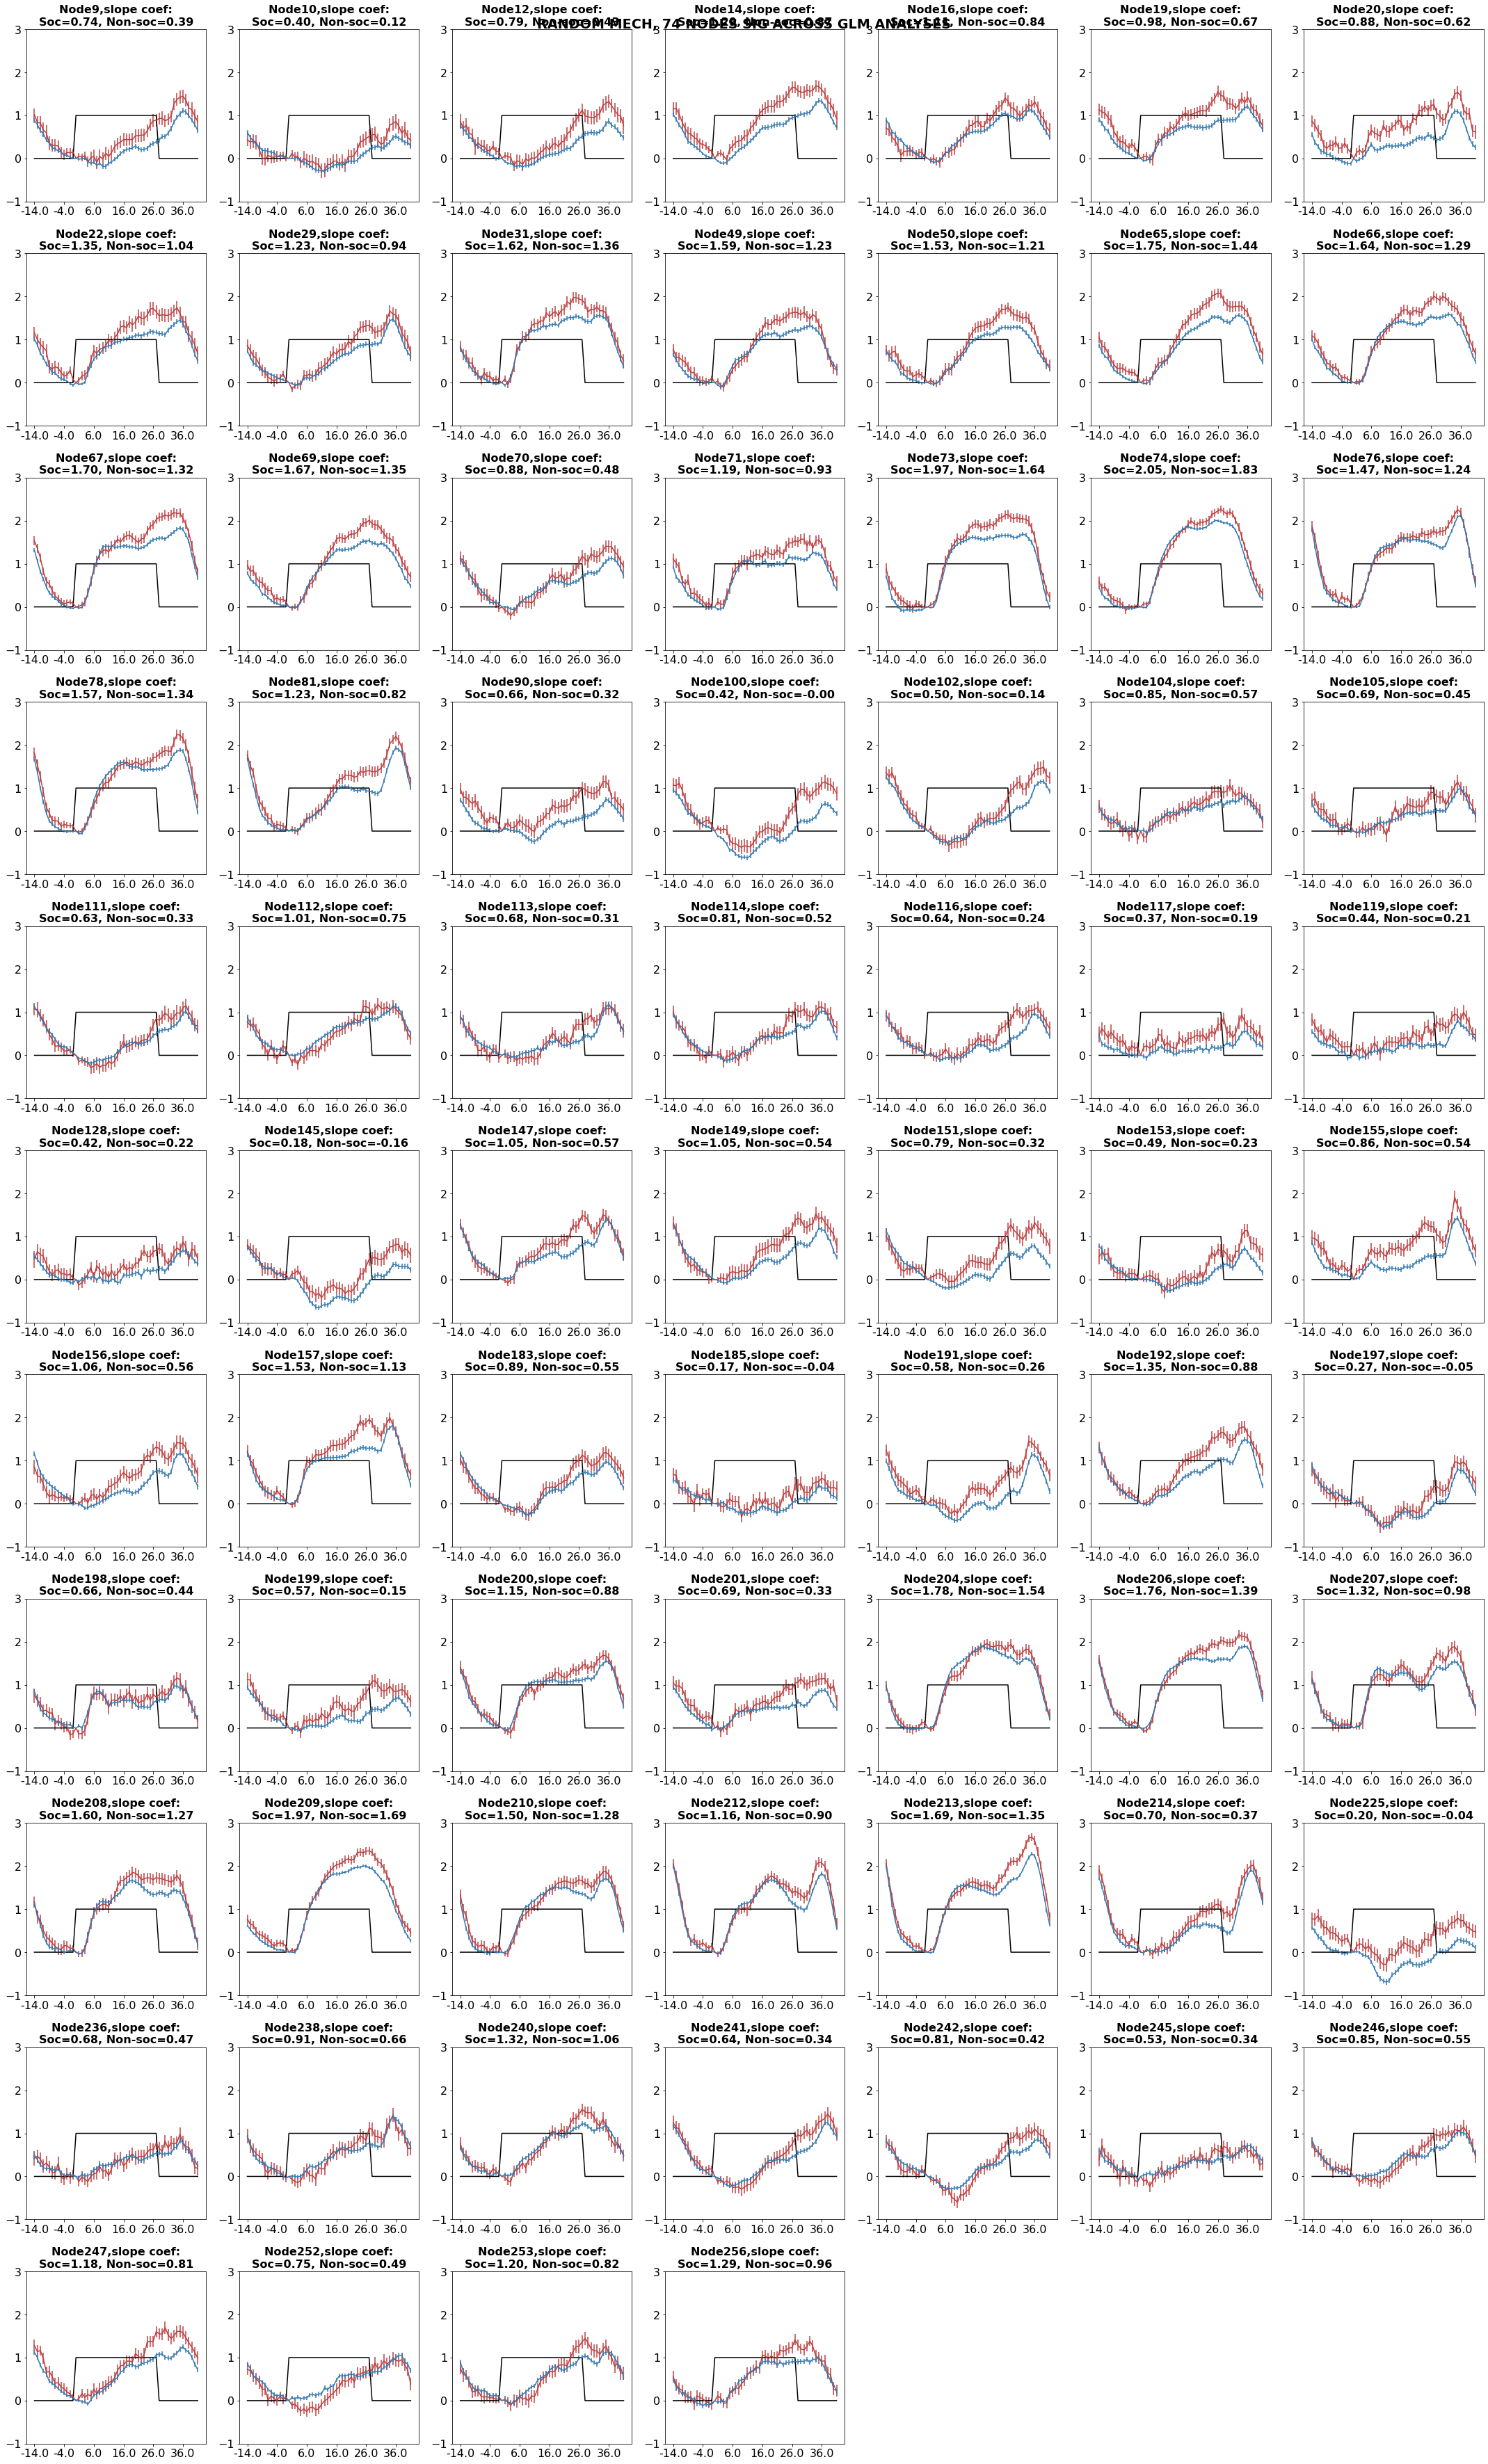

In [39]:
ymin,ymax = -1,3
plt.figure(1,figsize=(30,50))
boxcar = np.zeros((56,))
boxcar[14:42] = 1
plt.suptitle('RANDOM MECH, 74 NODES SIG ACROSS GLM ANALYSES',fontweight = 'bold')
for i,n in enumerate(np.where(nodes_coaxbill_rand_all)[0]): 
    plt.subplot (11,7,i+1)
    plt.title(f'Node{n+1},slope coef:\nSoc={mean_slope_soc[n]:.2f}, Non-soc={mean_slope_nonsoc[n]:.2f}',fontweight = 'bold')
    plt.ylim(ymin,ymax)
    y1 = tcs_run_z[responses[:,movie_ind]==1,n,:,movie_ind]# subs*timepts
    y2 = tcs_run_z[responses[:,movie_ind]==0,n,:,movie_ind]
    plt.errorbar(range(y1.shape[1]),np.nanmean(y1,axis=0),stats.sem(y1,axis=0),color = red_rgb)
    plt.errorbar(range(y2.shape[1]),np.nanmean(y2,axis=0),stats.sem(y2,axis=0),color = blue_rgb)
    plt.xticks(np.linspace(0,60,7),[str(np.round(i,2)-14) for i in np.linspace(0,60,7)])
    plt.plot(boxcar,color = 'k')
    
plt.tight_layout()


plt.savefig(os.path.join(fig_save_loc,'rand_timecourse_S_NS.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


## COAX-BILL

 - even though dividing by maxmin makes more sense than std in general, for now i'm keeping to the regular zscore - didn't make a huge difference and the other results are already with the z-score

In [65]:
tcs_trial_z = np.load(os.path.join(data_file_loc,'timecourses_trial_norm',f'timecourse-all-movies_zscorenorm.npy')) 
print(tcs_trial_z.shape)

#tcs_trial_z = np.load(os.path.join(data_file_loc,'timecourses_trial_norm',f'timecourse-all-movies_zscorenorm_maxmindiv_tr0-7_to_tr28+14.npy'))  # movie wise timecourses from tr-14:tr+14
print(tcs_trial_z.shape)

movie_inds = [0,1]
subs = (responses[:,movie_inds[0]]==1) & (responses[:,movie_inds[1]]==0) # subs who respoded "nonsocial" to BILL and "social" to COAX
np.where(subs)[0].shape

(1048, 268, 56, 10)
(1048, 268, 56, 10)


(870,)

In [72]:
coef_slope_coax = np.load(os.path.join(data_file_loc,'coefs_trial_norm','slope_reg','coef_slopereg_trialnorm_COAXING-B.npy'))
coef_slope_bill = np.load(os.path.join(data_file_loc,'coefs_trial_norm','slope_reg','coef_slopereg_trialnorm_BILLIARD-A.npy'))
print(coef_slope_bill.shape)


mean_slope_soc = np.nanmean(coef_slope_coax[responses[:,movie_inds[0]]==1,:],axis=0)
mean_slope_nonsoc = np.nanmean(coef_slope_bill[responses[:,movie_inds[1]]==0,:],axis=0)
mean_slope_soc.shape

(1048, 268)


(268,)

/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice
/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:136: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice
/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:136: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice
/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:136: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subo

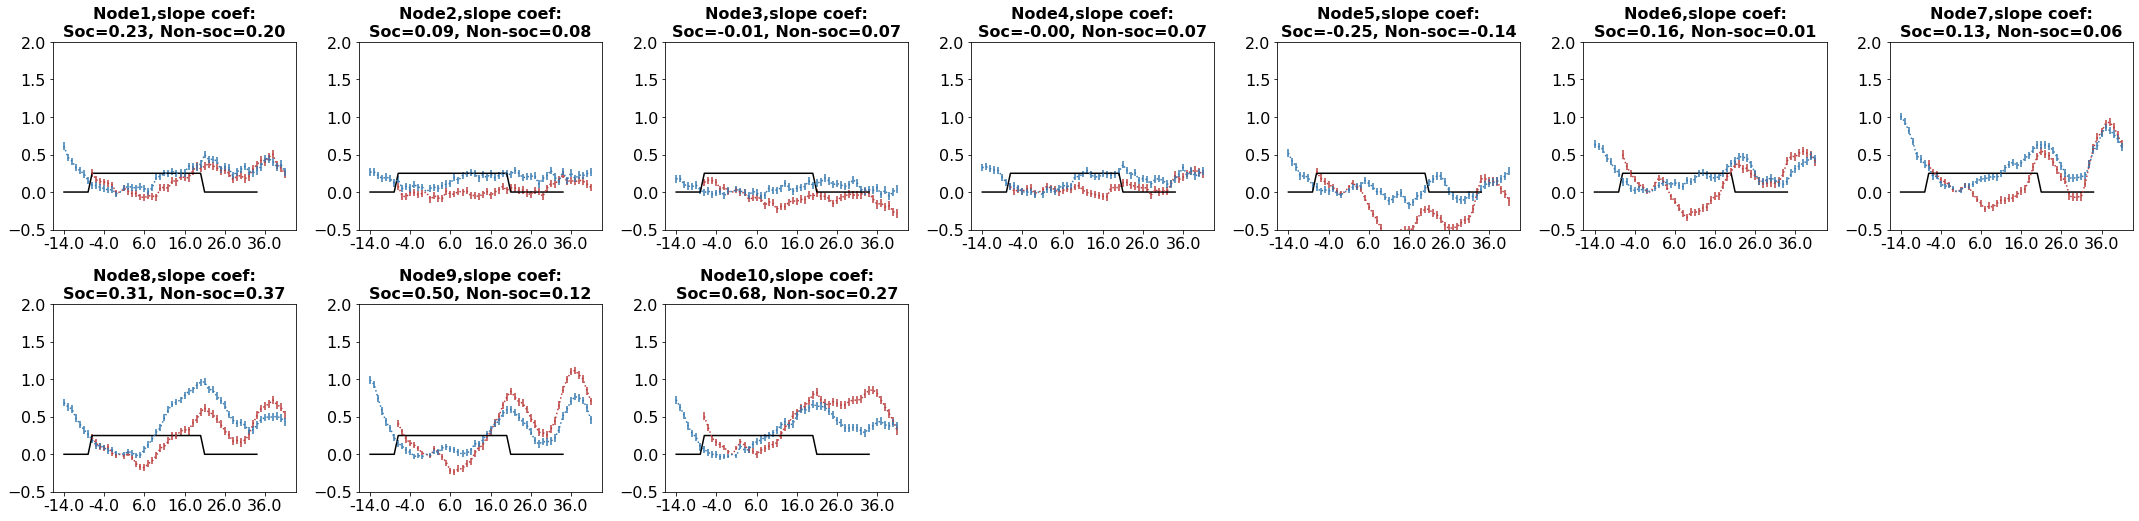

In [73]:
nodes_tc_auc_analysis = [20,22,23,26,73,104,157,164,208,262] 

ymin,ymax = -.5,2
plt.figure(1,figsize=(30,40))

boxcar = np.zeros((49,))
boxcar[7:35] = .25

for i,n in enumerate(np.where(nodes_tc_auc_analysis)[0]):
    plt.subplot (11,7,i+1)
    plt.title(f'Node{n+1},slope coef:\nSoc={mean_slope_soc[n]:.2f}, Non-soc={mean_slope_nonsoc[n]:.2f}',fontweight = 'bold')
    plt.ylim(ymin,ymax)
    
    '''y1 = tcs_run_z[subs,n,:,0]# subs*timepts
    for i in range(y1.shape[0]): # flip nans from the end to beginning
        y1[i,7:] = y1[i,:49]
        y1[i,:7] = np.nan
    y2 = tcs_run_z[subs,n,:,1]
    plt.errorbar(range(y1.shape[1]),np.nanmean(y1,axis=0),stats.sem(y1,axis=0,nan_policy='omit'),color = red_rgb)
    plt.errorbar(range(y2.shape[1]),np.nanmean(y2,axis=0),stats.sem(y2,axis=0,nan_policy='omit'),color = blue_rgb)'''

    y1 = tcs_trial_z[subs,n,:,0]# subs*timepts
    for i in range(y1.shape[0]): # flip nans from the end to beginning
        y1[i,7:] = y1[i,:49]
        y1[i,:7] = np.nan
    y2 = tcs_trial_z[subs,n,:,1]
    plt.errorbar(range(y1.shape[1]),np.nanmean(y1,axis=0),stats.sem(y1,axis=0,nan_policy='omit'),color = red_rgb,ls = ':')
    plt.errorbar(range(y2.shape[1]),np.nanmean(y2,axis=0),stats.sem(y2,axis=0,nan_policy='omit'),color = blue_rgb,ls =':')
   
    plt.xticks(np.linspace(0,60,7),[str(np.round(i,2)-14) for i in np.linspace(0,60,7)])
    plt.plot(boxcar,color = 'k')
    
plt.tight_layout()


/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:136: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:136: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:136: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subo

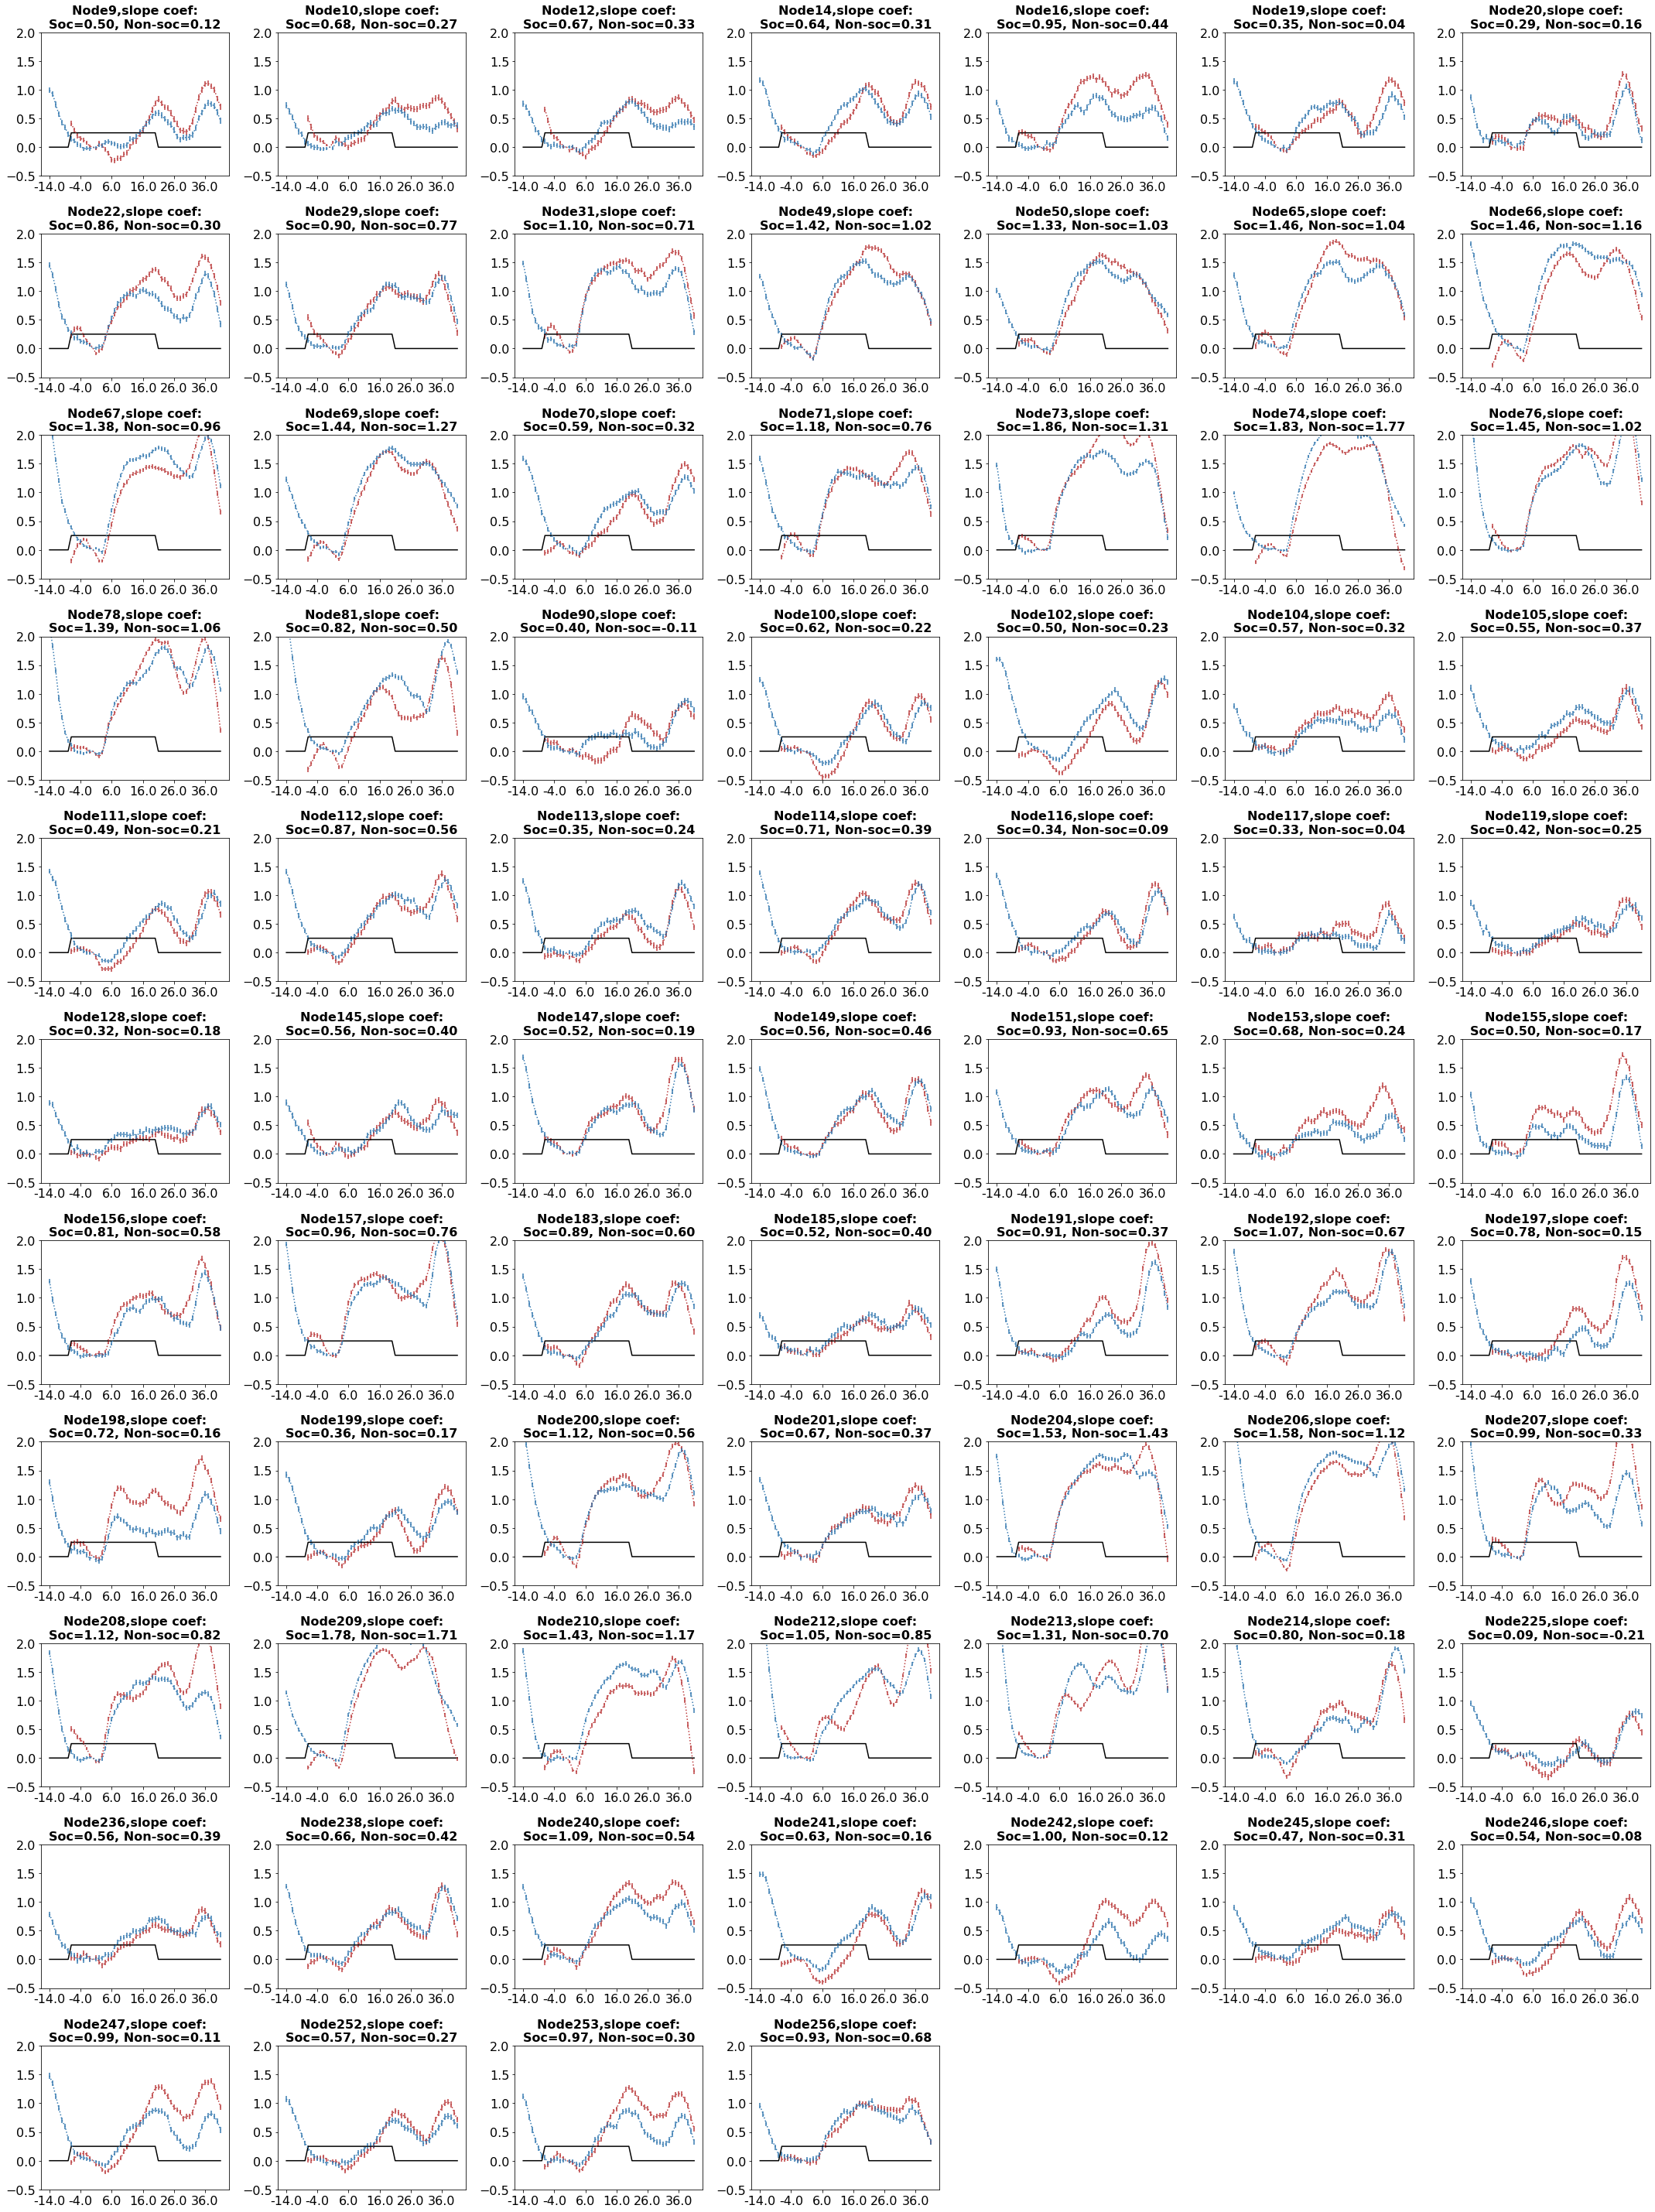

In [69]:
ymin,ymax = -.5,2
boxcar = np.zeros((56,))
boxcar[7:35] = .25

plt.figure(1,figsize=(30,40))

for i,n in enumerate(np.where(nodes_coaxbill_rand_all)[0]):
    plt.subplot (11,7,i+1)
    plt.title(f'Node{n+1},slope coef:\nSoc={mean_slope_soc[n]:.2f}, Non-soc={mean_slope_nonsoc[n]:.2f}',fontweight = 'bold')
    plt.ylim(ymin,ymax)
    
    #y1 = tcs_run_z[subs,n,:,0]# subs*timepts
    #for i in range(y1.shape[0]): # flip nans from the end to beginning
    #    y1[i,7:] = y1[i,:49]
    #    y1[i,:7] = np.nan
    #y2 = tcs_run_z[subs,n,:,1]
    #plt.errorbar(range(y1.shape[1]),np.nanmean(y1,axis=0),stats.sem(y1,axis=0,nan_policy='omit'),color = red_rgb)
    #plt.errorbar(range(y2.shape[1]),np.nanmean(y2,axis=0),stats.sem(y2,axis=0,nan_policy='omit'),color = blue_rgb)

    y1 = tcs_trial_z[subs,n,:,0]# subs*timepts
    for i in range(y1.shape[0]): # flip nans from the end to beginning
        y1[i,7:] = y1[i,:49]
        y1[i,:7] = np.nan
    y2 = tcs_trial_z[subs,n,:,1]
    plt.errorbar(range(y1.shape[1]),np.nanmean(y1,axis=0),stats.sem(y1,axis=0,nan_policy='omit'),color = red_rgb,ls = ':')
    plt.errorbar(range(y2.shape[1]),np.nanmean(y2,axis=0),stats.sem(y2,axis=0,nan_policy='omit'),color = blue_rgb,ls =':')
   
    plt.xticks(np.linspace(0,60,7),[str(np.round(i,2)-14) for i in np.linspace(0,60,7)])
    plt.plot(boxcar,color = 'k')
    
plt.tight_layout()
plt.savefig(os.path.join(fig_save_loc,'coaxbill_trialnorm_timecourse_S_NS.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


## All movies


In [20]:
tcs_run_z = np.load(os.path.join(data_file_loc,'timecourses_run_norm',f'timecourse-all-movies_zscorenorm.npy'))  # movie wise timecourses from tr-14:tr+14
tcs_run_z.shape


(1048, 268, 56, 10)

In [ ]:
[timepts_indiv_movie,vid_start_rel_tr] = np.load(os.path.join(data_file_loc,'Video_TRs.npy'),allow_pickle=True)
l_task = 28


In [41]:
coef_slope_all  = np.load(os.path.join(data_file_loc,'coef_slopereg_all.npy')) # reg coefft all movies (fig3d)
print(coef_slope_all.shape)

(1048, 268, 2)


In [42]:
mean_coef_slope_all = np.nanmean(coef_slope_all,axis=2) # average across runs, 1048*268
mean_slope_soc_minus_nonsoc_all = np.nanmean(mean_coef_slope_all,axis=0) # average across subjects
mean_slope_soc_minus_nonsoc_all.shape


/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


(268,)

In [43]:
# first of all, best to remove subjects with < 10 responses for power in general
count_resp = np.zeros((responses.shape[0],))
for i in range(responses.shape[0]):
    count_resp[i] = len(np.where(~np.isnan(responses[i,:]))[0])
subs_10resp = np.where(count_resp == 10)[0]
print(len(subs_10resp))

tcs_run_z_all10resp = np.empty_like(tcs_run_z)
tcs_run_z_all10resp[:] = np.nan
tcs_run_z_all10resp[subs_10resp,:,:] = tcs_run_z[subs_10resp,:,:]


814


In [45]:
[timepts_indiv_movie,vid_start_rel_tr] = np.load(os.path.join(data_file_loc,'Video_TRs.npy'),allow_pickle=True)
l_task = 28


In [46]:
tcs_resh_yes = []
tcs_resh_no = []

for m in range(10):
    if m not in [0,5]:
        tcs_resh_yes.append(tcs_run_z_all10resp[responses[:,m]==1,:,:,m])# yes subs * nodes*timepts
        tcs_resh_no.append( tcs_run_z_all10resp[responses[:,m]==0,:,:,m])
    else: # if the first movie in run 1 or 2 (coaxing/scaring)
        tc = np.empty((tcs_run_z_all10resp.shape[0],tcs_run_z_all10resp.shape[1],tcs_run_z_all10resp.shape[2])) # all subs * nodes*timepts
        tc[:] = np.nan
        tc[:,:,7:] = tcs_run_z_all10resp[:,:,:49,m]
        tcs_resh_yes.append(tc[responses[:,m]==1,:,:])
        tcs_resh_no.append(tc[responses[:,m]==0,:,:])

tcs_resh_yes = np.concatenate(tcs_resh_yes,axis=0)
tcs_resh_no = np.concatenate(tcs_resh_no,axis=0)
print('Across movies: \n\tyes:'+ str(tcs_resh_yes.shape) + ',no:' + str(tcs_resh_no.shape))

lme_all_coefs= np.load(os.path.join(data_file_loc,'coefs_run_norm','slope_reg','lmecoefs_all_soc_v_nonsoc_allmovies.npy'))



Across movies: 
	yes:(4905, 268, 56),no:(4294, 268, 56)


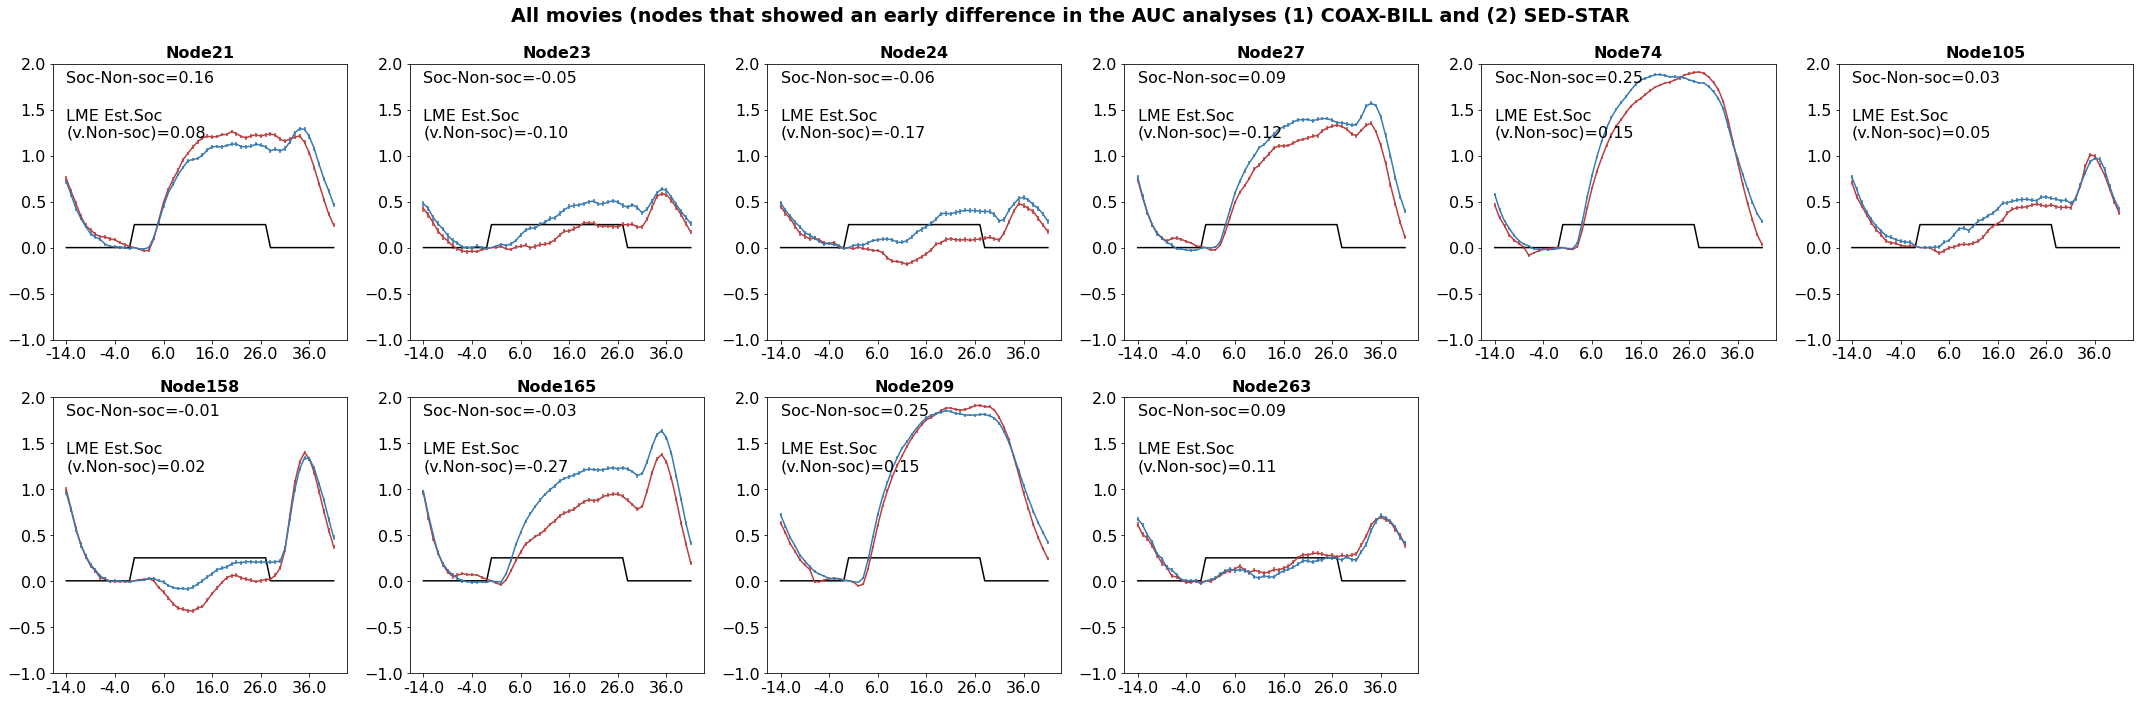

In [52]:
nodes_tc_auc_analysis = [20,22,23,26,73,104,157,164,208,262] # nodes that showed up in the AUC analysis
movie_ind = 4

# all movies
ymin,ymax = -1,2
plt.figure(1,figsize=(30,10))
plt.suptitle('All movies (nodes that showed an early difference in the AUC analyses (1) COAX-BILL and (2) SED-STAR',fontweight = 'bold')
boxcar = np.zeros((56,))
boxcar[14:42] = .25
for i,n in enumerate(nodes_tc_auc_analysis):
    plt.subplot (2,6,i+1)
    
    plt.title(f'Node{n+1}',fontweight = 'bold')
    plt.text(0,.9*ymax,f'Soc-Non-soc={mean_slope_soc_minus_nonsoc_all[n]:.2f}')
    plt.text(0,.6*ymax,f'LME Est.Soc\n(v.Non-soc)={lme_all_coefs[n]:.2f}')
    plt.ylim(ymin,ymax)
    y1 = tcs_resh_yes[:,n,:]# subs*timepts
    y2 = tcs_resh_no[:,n,:]
    plt.errorbar(range(y1.shape[1]),np.nanmean(y1,axis=0),stats.sem(y1,axis=0,nan_policy='omit'),color = red_rgb)
    plt.errorbar(range(y2.shape[1]),np.nanmean(y2,axis=0),stats.sem(y2,axis=0,nan_policy='omit'),color = blue_rgb)
    plt.xticks(np.linspace(0,60,7),[str(np.round(i,2)-14) for i in np.linspace(0,60,7)])
    plt.plot(boxcar,color = 'k')
    
plt.tight_layout()


#plt.savefig(os.path.join(fig_save_loc,'all_timecourse_S_NS.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')



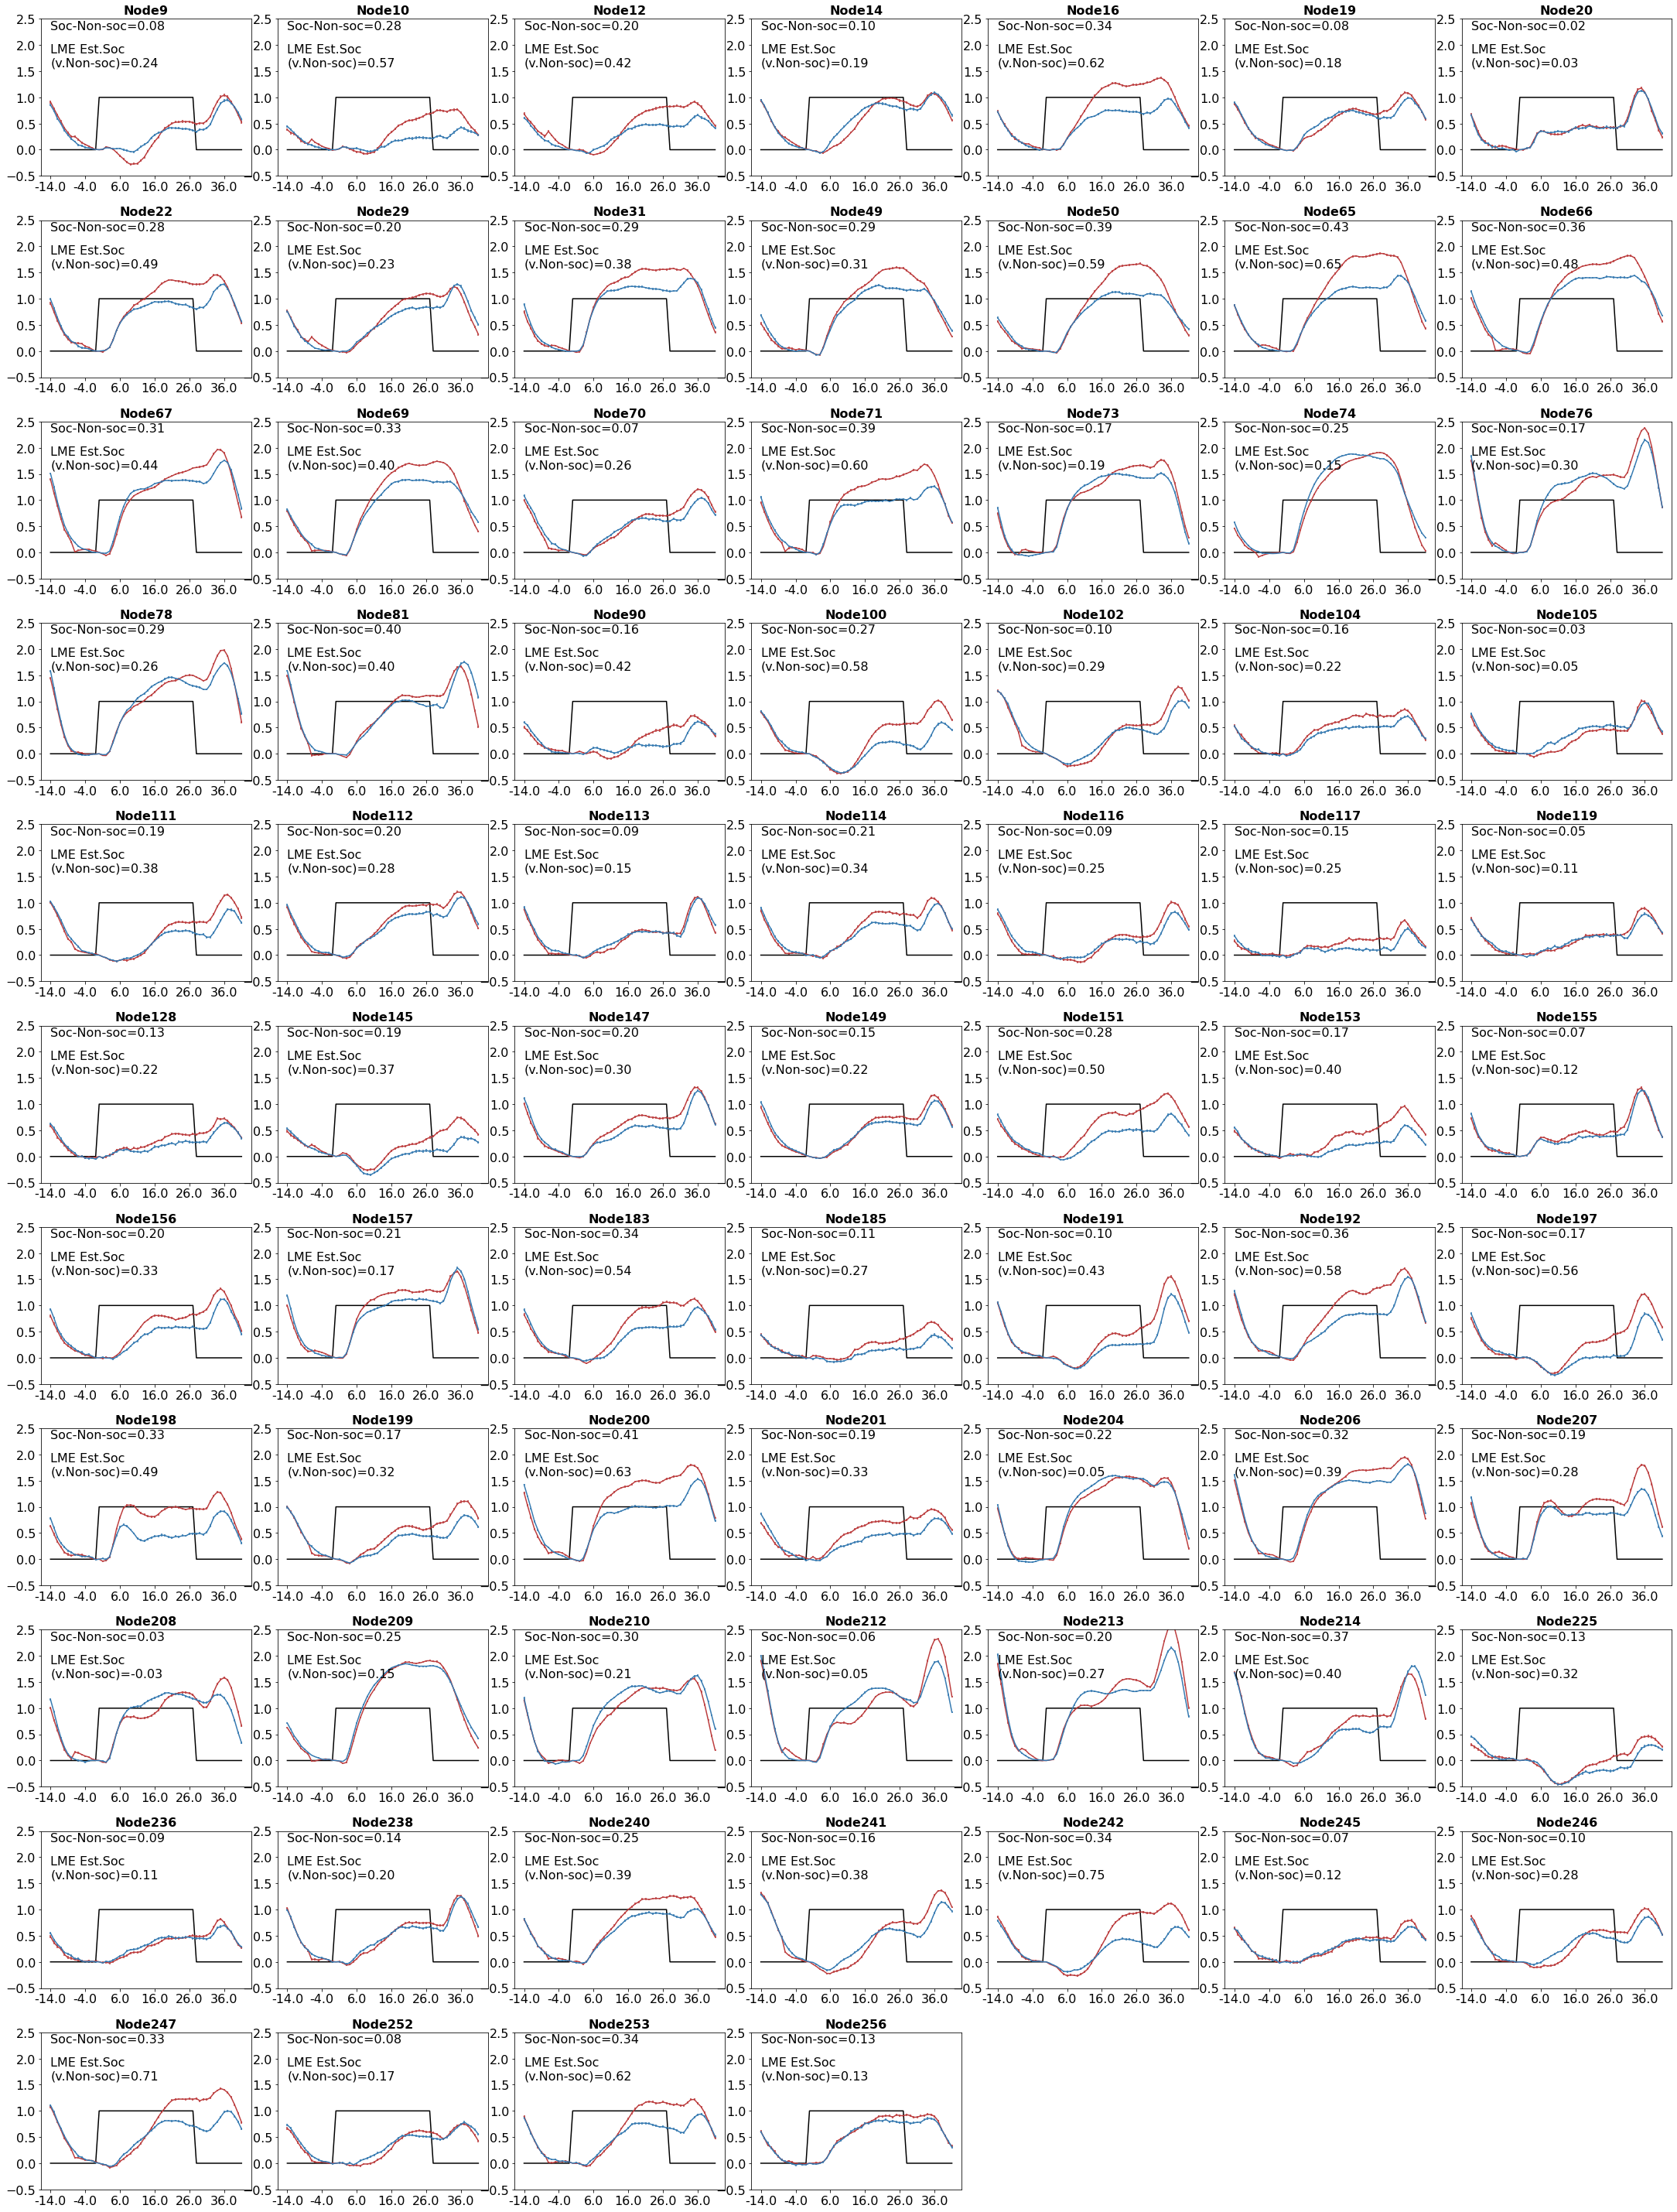

In [51]:
# all movies
ymin,ymax = -.5,2.5
plt.figure(1,figsize=(30,40))
boxcar = np.zeros((56,))
boxcar[14:42] = 1
for i,n in enumerate(np.where(nodes_coaxbill_rand_all)[0]):
    plt.subplot (11,7,i+1)
    
    plt.title(f'Node{n+1}',fontweight = 'bold')
    plt.text(0,2.3,f'Soc-Non-soc={mean_slope_soc_minus_nonsoc_all[n]:.2f}')
    plt.text(0,1.6,f'LME Est.Soc\n(v.Non-soc)={lme_all_coefs[n]:.2f}')
    plt.ylim(ymin,ymax)
    y1 = tcs_resh_yes[:,n,:]# subs*timepts
    y2 = tcs_resh_no[:,n,:]
    plt.errorbar(range(y1.shape[1]),np.nanmean(y1,axis=0),stats.sem(y1,axis=0,nan_policy='omit'),color = red_rgb)
    plt.errorbar(range(y2.shape[1]),np.nanmean(y2,axis=0),stats.sem(y2,axis=0,nan_policy='omit'),color = blue_rgb)
    plt.xticks(np.linspace(0,60,7),[str(np.round(i,2)-14) for i in np.linspace(0,60,7)])
    plt.plot(boxcar,color = 'k')
    
plt.tight_layout()


plt.savefig(os.path.join(fig_save_loc,'all_timecourse_S_NS.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


## All movies except RAND MECH

In [49]:
other_movies = [0,1,2,3,5,6,7,8,9]
tcs_resh_yes_othermovies = []
tcs_resh_no_othermovies = []
for m in other_movies:
    if m not in [0,5]:
        tcs_resh_yes_othermovies.append(tcs_run_z_all10resp[responses[:,m]==1,:,:,m])# yes subs * nodes*timepts
        tcs_resh_no_othermovies.append( tcs_run_z_all10resp[responses[:,m]==0,:,:,m])
    else:
        tc = np.empty((tcs_run_z_all10resp.shape[0],tcs_run_z_all10resp.shape[1],tcs_run_z_all10resp.shape[2])) # all subs * nodes*timepts
        tc[:] = np.nan
        tc[:,:,vid_start_rel_tr[m]:] = tcs_run_z_all10resp[:,:,:49,m]
        tcs_resh_yes_othermovies.append(tc[responses[:,m]==1,:,:])
        tcs_resh_no_othermovies.append(tc[responses[:,m]==0,:,:])

tcs_resh_yes_othermovies = np.concatenate(tcs_resh_yes_othermovies,axis=0)
tcs_resh_no_othermovies = np.concatenate(tcs_resh_no_othermovies,axis=0)
print('Across movies: \n\tyes:'+ str(tcs_resh_yes_othermovies.shape) + ',no:' + str(tcs_resh_no_othermovies.shape))

lme_allother_coefs= np.load(os.path.join(data_file_loc,'coefs_run_norm','slope_reg','lmecoefs_all_soc_v_nonsoc_othermovies.npy'))


Across movies: 
	yes:(4817, 268, 56),no:(3707, 268, 56)


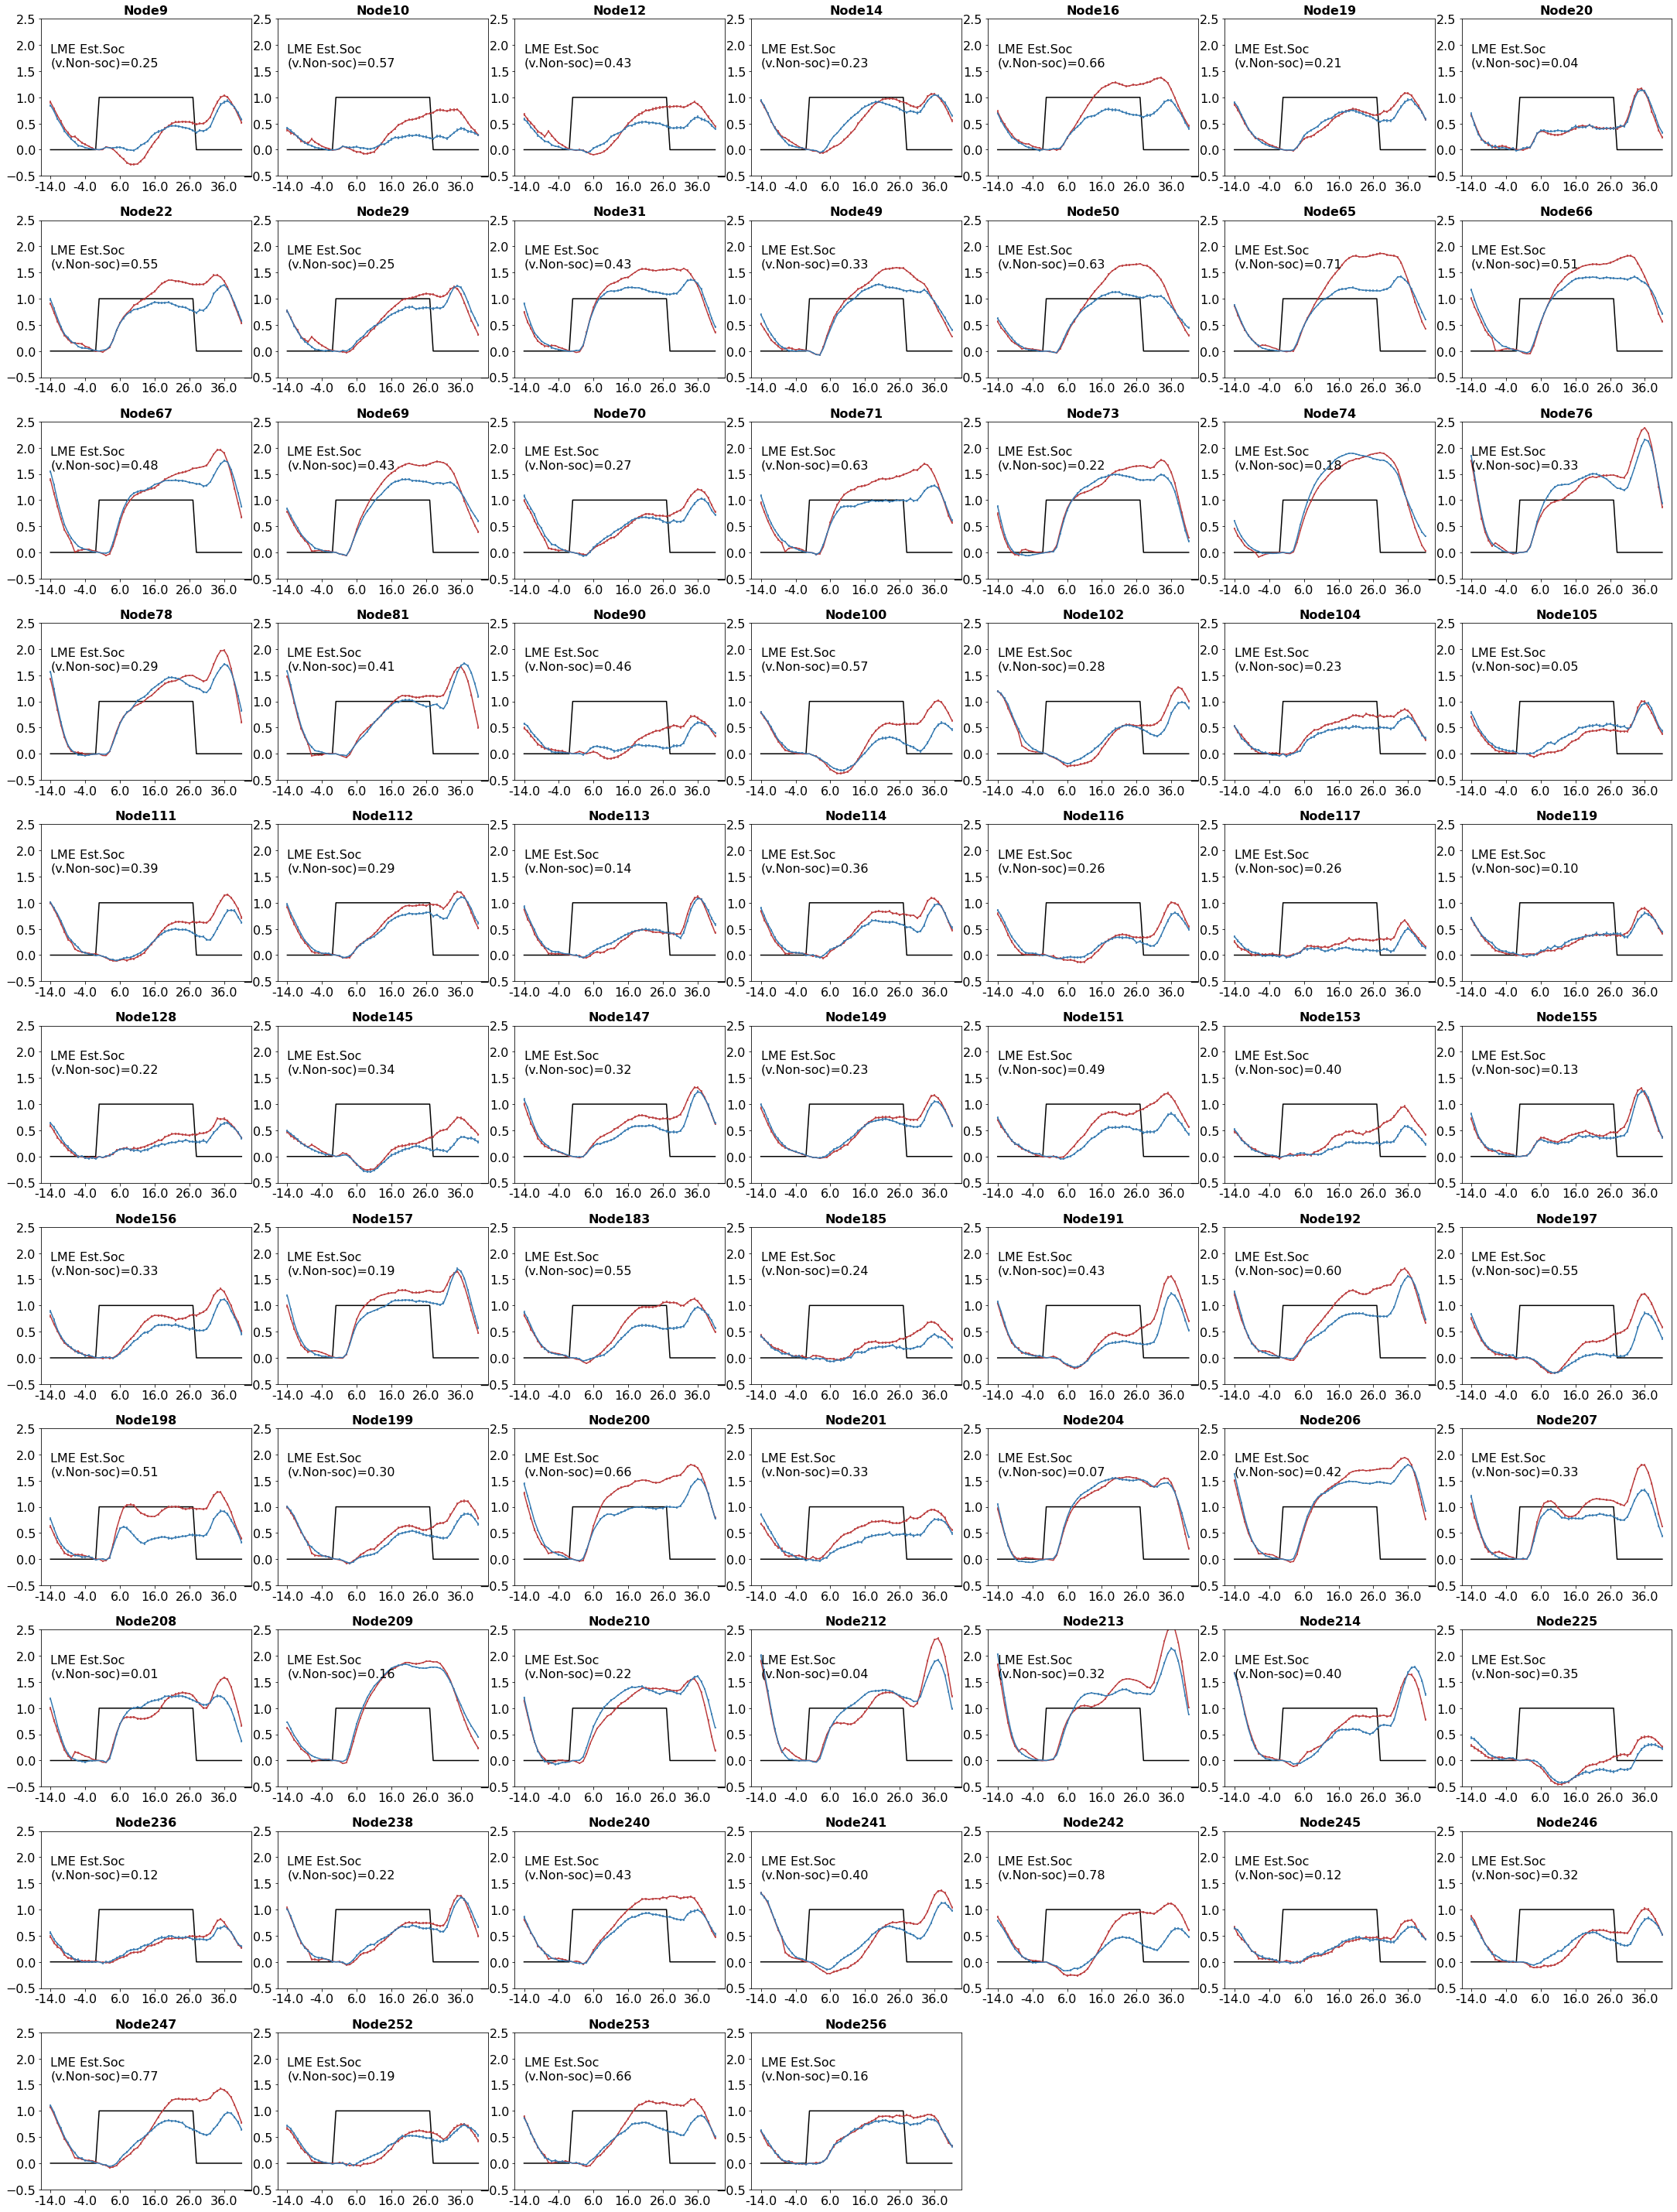

In [50]:
#all other movies
ymin,ymax = -.5,2.5
plt.figure(1,figsize=(30,40))
boxcar = np.zeros((56,))
boxcar[14:42] = 1
for i,n in enumerate(np.where(nodes_coaxbill_rand_all)[0]):
    plt.subplot (11,7,i+1)
    
    plt.title(f'Node{n+1}',fontweight = 'bold')
    plt.text(0,1.6,f'LME Est.Soc\n(v.Non-soc)={lme_allother_coefs[n]:.2f}')
    plt.ylim(ymin,ymax)
    y1 = tcs_resh_yes_othermovies[:,n,:]# subs*timepts
    y2 = tcs_resh_no_othermovies[:,n,:]
    plt.errorbar(range(y1.shape[1]),np.nanmean(y1,axis=0),stats.sem(y1,axis=0,nan_policy='omit'),color = red_rgb)
    plt.errorbar(range(y2.shape[1]),np.nanmean(y2,axis=0),stats.sem(y2,axis=0,nan_policy='omit'),color = blue_rgb)
    plt.xticks(np.linspace(0,60,7),[str(np.round(i,2)-14) for i in np.linspace(0,60,7)])
    plt.plot(boxcar,color = 'k')
    
plt.tight_layout()


plt.savefig(os.path.join(fig_save_loc,'allothermovies_timecourse_S_NS.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


# ALL TIMECOURSES (from june-ish)

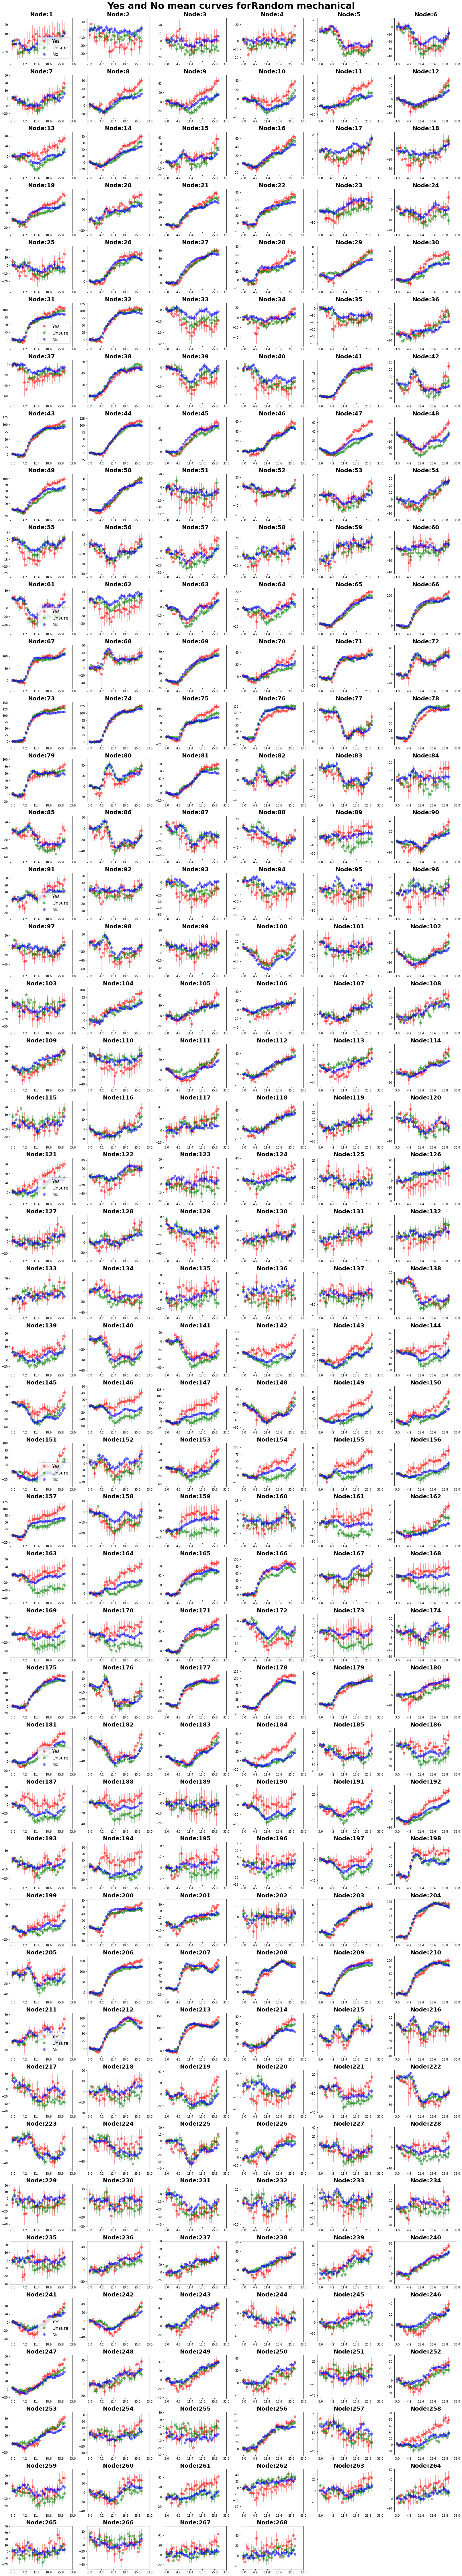

In [6]:
ncols = 6
nrows= int(np.ceil(268/ncols))
#fig, axes = plt.subplots(67,4, figsize=(15,150))
xwidth = 22.5
yheight = 125# .75*nrows*xwidth/ncols
fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))
fig.set_figwidth(xwidth)
fig.set_figheight(yheight)
movie_ind = 4
fig.suptitle(f'Yes and No mean curves for{vidnames[movie_ind]}', y=.998,fontsize = 32, fontweight = 'bold')
for n in range(268):
    
    r = int(np.floor(n/ncols))
    c = int(np.floor(n%ncols))
            
    for resp in ['Yes','Unsure','No']:
        if resp =='Yes':
            y = movie_tc_yes[:,n,:,movie_ind]
            col = 'r'
        elif resp =='No':
            y = movie_tc_no[:,n,:,movie_ind]
            col ='b'
        elif resp =='Unsure':
            y = movie_tc_unsure[:,n,:,movie_ind]
            col ='g'
        ax[r,c].errorbar(range(32),np.nanmean(y,axis=0), stats.sem(y,axis=0,nan_policy='omit'),linestyle = 'None', marker = 'o',alpha = .5, markersize = 8, color = col,label = resp)
        ax[r,c].set_xticks(np.linspace(0,36,6))
        ax[r,c].set_xticklabels([str(i-3) for i in np.linspace(0,36,6)])
    ax[r,c].set_title(f'Node:{n+1}', fontweight = 'bold', fontsize = 20)
    if n%30 ==0:
        ax[r,c].legend(loc='lower right', fontsize = 16)
ax[r,c+1].axis('off')
ax[r,c+2].axis('off')
 
plt.tight_layout()

# extra

### Plot average across all movies to get an idea


In [ ]:
# 
# 
# # RUN THIS CELL
def get_mean_timecourses_respbased():
    # returns timeourses and means/medians of yes and no responders separately. 
    # doesn't take any inputs, but data_file_loc (location with responseinfo and movie timecourse) 
    # needs to be previously defined
    # response file has a mat of dims nsub*nmovies
    # each movie timecourse file has the dims: nsub*nnodes*ntimepts(43)
    #responses = np.load(os.path.join(data_file_loc,'responses_slopereg.npy')) # subs*movies
    responses = np.load(os.path.join(data_file_loc,'responses.npy')) # subs*movies
    nmovies = 10

    fileName = os.path.join(data_file_loc,'timecourses_run_norm',f'timecourse-all-movies_zscorenorm.npy')
    movieTC = np.load(fileName) # nsubs * nnodes * ntimepts*nmovies
       
    for movie_ind in range(nmovies):
         movieTC_m = movieTC_m[:,:,:,movie_ind]
         
        if movie_ind == 0:
            movie_tc_yes, movie_tc_no, movie_tc_unsure = [np.empty((movieTC_m.shape[0],movieTC_m.shape[1],movieTC_m.shape[2],nmovies)) for _ in range(3)]
            movie_tc_yes[:],movie_tc_no[:],movie_tc_unsure[:] = [np.nan] * 3
        
        resp_yes = responses[:,movie_ind] == 1
        resp_no = responses[:,movie_ind] == 0
        resp_unsure = responses[:,movie_ind] == 9
       
        movie_tc_yes[resp_yes,:,:,movie_ind] = movieTC_m[resp_yes,:,:] # yes * nodes*timepts: fills out only yes rows
        movie_tc_no[resp_no,:,:,movie_ind] = movieTC_m[resp_no,:,:] # fills out only no rows
        movie_tc_unsure[resp_unsure,:,:,movie_ind] = movieTC_m[resp_unsure,:,:] # fills out only no rows
        # nsubs * nnodes * ntimepts * nmovies
    mean_tc_yes = np.nanmean(movie_tc_yes, axis = (0,3))
    mean_tc_no = np.nanmean(movie_tc_no, axis = (0,3))
    mean_tc_unsure = np.nanmean(movie_tc_unsure, axis = (0,3))
    median_tc_yes = np.nanmedian(movie_tc_yes, axis = (0,3))
    median_tc_no = np.nanmedian(movie_tc_no, axis = (0,3))
    median_tc_unsure = np.nanmedian(movie_tc_unsure, axis = (0,3))
    return movie_tc_yes, movie_tc_no, movie_tc_unsure, mean_tc_yes, mean_tc_no, mean_tc_unsure, median_tc_yes, median_tc_no, median_tc_unsure


movie_tc_yes, movie_tc_no, movie_tc_unsure,mean_tc_yes, mean_tc_no, mean_tc_unsure, median_tc_yes, median_tc_no, median_tc_unsure = \
    get_mean_timecourses_respbased()

plt.figure(1,figsize = (12,8))
plt.subplot(2,2,1)
sns.heatmap(mean_tc_yes)
plt.xlabel('Image nr. since onset of stimuli')
plt.ylabel('Node number')
plt.title('Yes timecourses avged. across movies, subs')

plt.subplot(2,2,2)
sns.heatmap(mean_tc_no)
plt.xlabel('Image nr. since onset of stimuli')
plt.ylabel('Node number')
plt.title('No timecourses avged. across movies, subs')

plt.subplot(2,2,3)
sns.heatmap(mean_tc_yes - mean_tc_no)
plt.xlabel('Image nr. since onset of stimuli')
plt.ylabel('Node number')
plt.title('Yes-No timecourses avged. across movies, subs')
# from last subplot: differences emerge later in all nodes

plt.tight_layout()